In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bd_new.csv to bd_new (2).csv


In [ ]:
df = pd.read_csv("bd_new (2).csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 38 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Timestamp                                                                                       1091 non-null   object 
 1   Score                                                                                           0 non-null      float64
 2   Name                                                                                            1091 non-null   object 
 3   Gender                                                                                          1091 non-null   object 
 4   Age                                                                                             1091 non-null   int64  
 5   Education qua

In [ ]:
df.columns

Index(['Timestamp', 'Score', 'Name', 'Gender', 'Age',
       'Education qualification', 'Occupation',
       'If  Other  then Please Specify',
       'Account NO(not manadatory to disclose)', 'Account Type', 'City',
       'Branch', 'Current City',
       'House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)',
       'Opening Balance', 'Having Minimum Balance', 'Current Balance',
       'Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)',
       'Quarterly Activity Rate(no of transaction in 3 month)',
       'Do you have multiple account',
       'if Yes then in which Bank(please use ; to seperate the bank names)',
       'Do you have an active  loan ',
       'Do you have Internet Banking or mobile banking with this  account',
       'if yes then which one',
       'Do you have active Credit Card with this account',
       'Did any suspicious transaction reported in your account',
       'Have you ever defaulted any 

In [ ]:
#drop irrelevant columns
to_drop = ['Timestamp','Score','Name','Account NO(not manadatory to disclose)','If  Other  then Please Specify',
           'Branch','if Yes then in which Bank(please use ; to seperate the bank names)','if yes then which one',
           'If Yes then Please Specify','Email address','if Other Account then Please Specify','End date','Please suggest if any important performance indicator is missing from the above (Word Cloud)']

In [ ]:
df1 = df.drop(to_drop, axis =1)

Dealing with missing values

In [ ]:
df1.isnull().sum()

Gender                                                                                              0
Age                                                                                                 0
Education qualification                                                                             2
Occupation                                                                                          2
Account Type                                                                                        2
City                                                                                                1
Current City                                                                                        3
House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)                        1
Opening Balance                                                                                     0
Having Minimum Balance                                                            

In [ ]:
#convert object to int
df1['Current Balance'] = df1['Current Balance'].str.replace(',', '').astype(int)

In [ ]:
# convert object to int
df1['Opening Balance'] = df1['Opening Balance'].str.replace(',', '').astype(int)


In [ ]:
#imputing with most frequent values
df1['Do you have recent closed Loan '].fillna("No", inplace = True)

In [ ]:
#imputing with most frequent values
df1['Do you have the Demat account associated to this account.'].fillna("No", inplace=True)

In [ ]:
#imputing with most frequent values
df1[' Transaction done in 24 month'].fillna("Yes", inplace =True)

In [ ]:
#imputing with most frequent values
df1['Received any service call from bank  in 24 month with reference to  your account. (EDA)'].fillna("No", inplace =True)

In [ ]:
df1['Quarterly Activity Rate(no of transaction in 3 month)'] = df1['Quarterly Activity Rate(no of transaction in 3 month)'].replace(',', '.', regex=True).astype(float)

In [ ]:
#imputing with median
df1['Quarterly Activity Rate(no of transaction in 3 month)'] =df1['Quarterly Activity Rate(no of transaction in 3 month)'] .fillna((df1['Quarterly Activity Rate(no of transaction in 3 month)'].median()))

In [ ]:
df1['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'] =df1['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'] .fillna(df1['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)'].mode()[0])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 25 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Gender                                                                                          1091 non-null   object 
 1   Age                                                                                             1091 non-null   int64  
 2   Education qualification                                                                         1089 non-null   object 
 3   Occupation                                                                                      1089 non-null   object 
 4   Account Type                                                                                    1089 non-null   object 
 5   City         

In [ ]:
df2 = df1.dropna()

In [ ]:
# convert object to int
df2['House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)'] = df2['House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)'].str.replace(r"[a-zA-Z]",'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
 df2['House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)']= df2['House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)'].replace(',', '.', regex=True).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#convert float columns to int
df2['House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)'] = df2['House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)'] .astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#float to int
df2['Quarterly Activity Rate(no of transaction in 3 month)'] = df2['Quarterly Activity Rate(no of transaction in 3 month)'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Univariate and Bivariate plots**

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 1089
Data columns (total 25 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------------  ----- 
 0   Gender                                                                                          1084 non-null   object
 1   Age                                                                                             1084 non-null   int64 
 2   Education qualification                                                                         1084 non-null   object
 3   Occupation                                                                                      1084 non-null   object
 4   Account Type                                                                                    1084 non-null   object
 5   City                

**Density plots**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


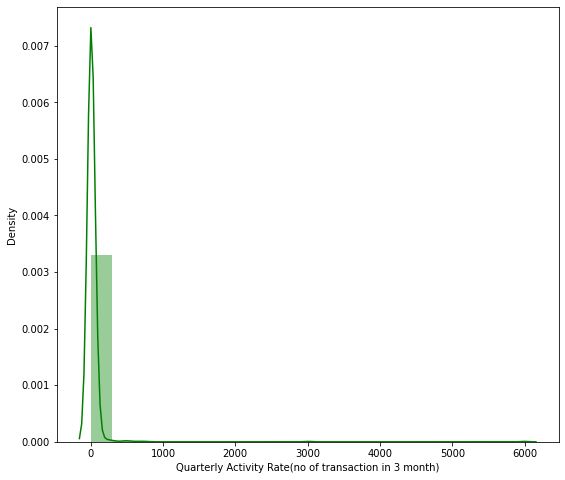

In [ ]:
plt.figure(figsize=(9,8))
sns.distplot(df2['Quarterly Activity Rate(no of transaction in 3 month)'], color = 'g', bins = 20, hist_kws={'alpha' : 0.4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


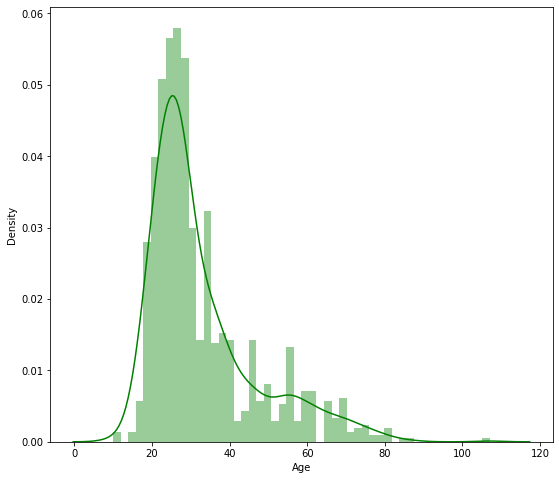

In [ ]:
plt.figure(figsize=(9,8))
sns.distplot(df2['Age'], color = 'g', bins = 50, hist_kws={'alpha' : 0.4})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


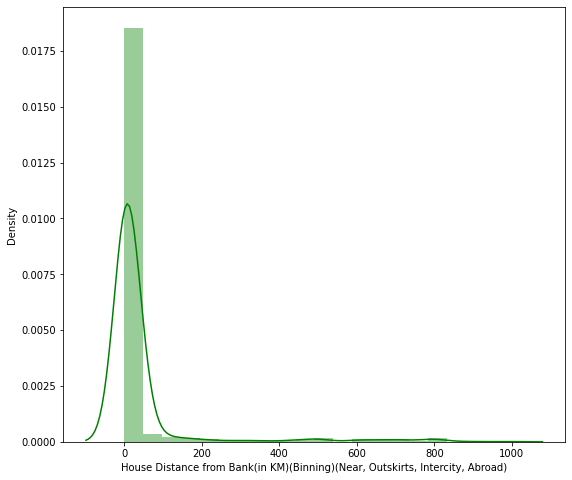

In [ ]:
plt.figure(figsize=(9,8))
sns.distplot(df2['House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)'], color = 'g', bins = 20, hist_kws={'alpha' : 0.4})

**Count plots**

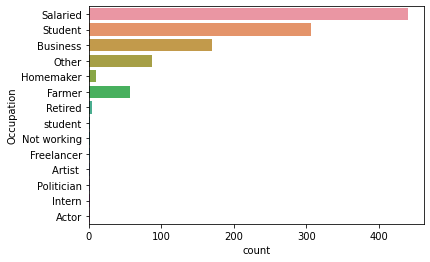

In [ ]:
sns.countplot(y = 'Occupation', data = df2)

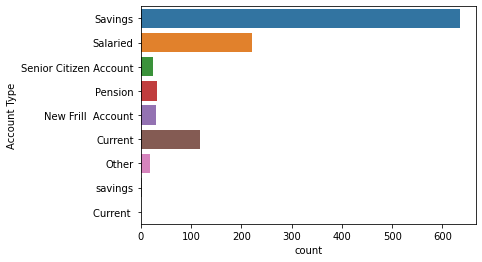

In [ ]:
sns.countplot(y = 'Account Type', data = df2)

In [ ]:
df2['Gender'] = df2['Gender'].replace(['Male '], 'Male')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


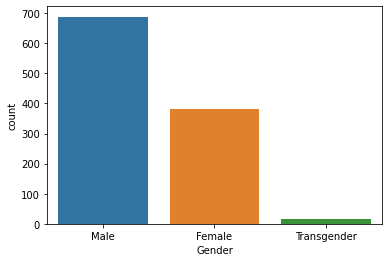

In [ ]:
sns.countplot('Gender', data = df2)

correlation - bivariate analysis

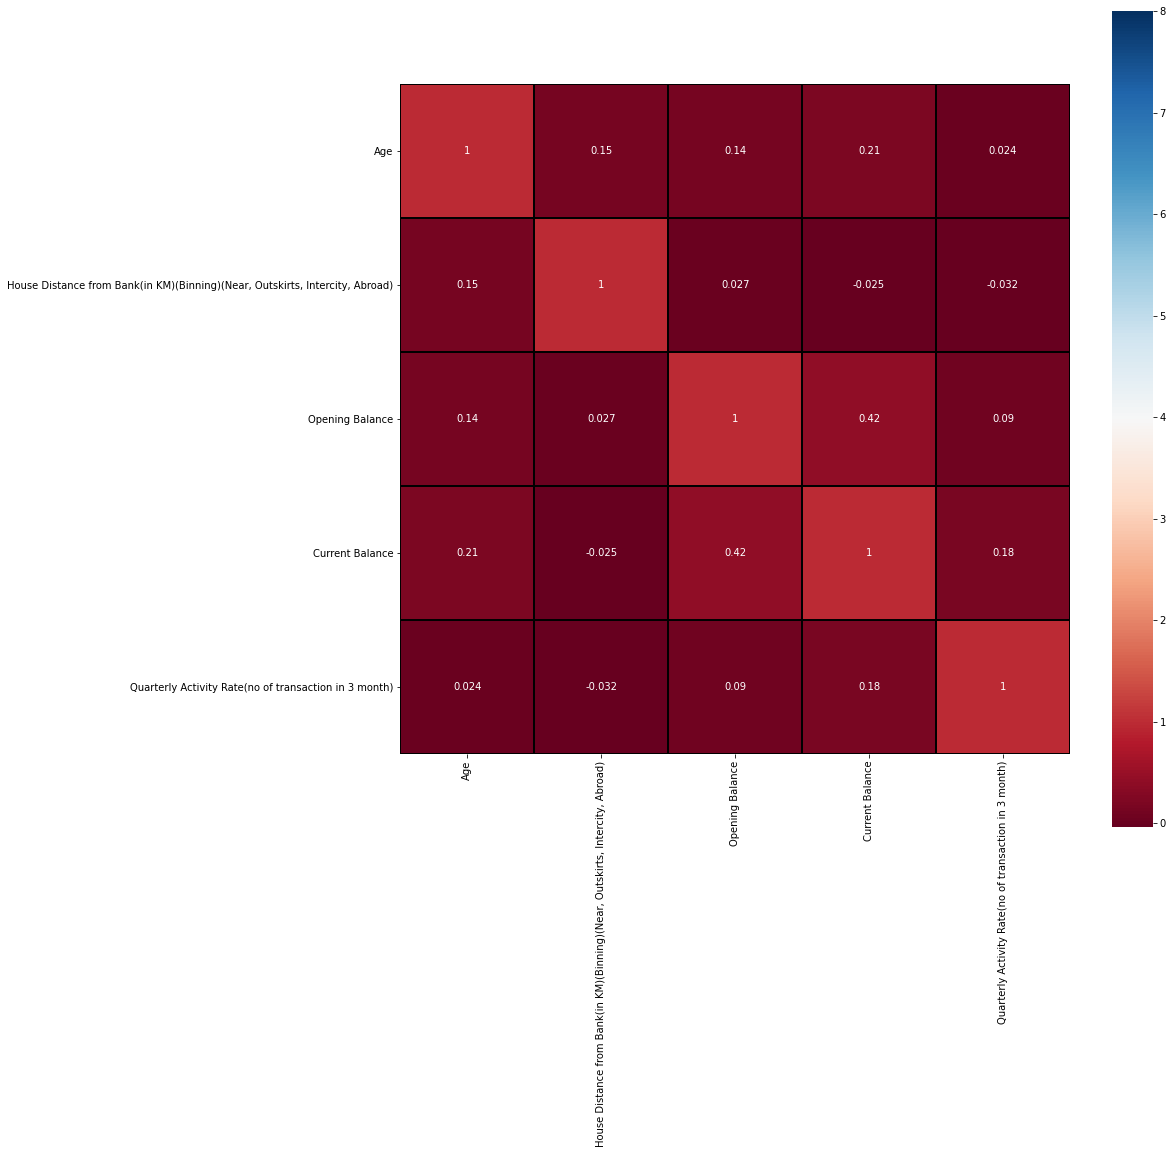

In [ ]:
corr = df2.corr(method = "spearman")
plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax = 8,linewidths = 1, square = True,annot = True, cmap='RdBu',linecolor = 'Black')

**plots between independent and dependent variables**

In [ ]:
df2['Current Status of your accounts (Output variable)']  = df['Current Status of your accounts (Output variable)'].replace(['Dormant( Not active since last 24 month)','Dormant( Not Active since last 24 month)'], 'Dormant')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


([<matplotlib.patches.Wedge at 0x7f0bd1860090>,
 [Text(-0.44876903220594594, 1.0042939588252728, 'Active'),
  Text(0.0859872525289328, -1.096634028471908, 'Dormant'),
  Text(1.1305104351411148, -0.4024253421903838, 'InActive( Not Active since last 12 month)')],
 [Text(-0.24478310847597046, 0.5477967048137851, '63.38'),
  Text(0.04690213774305425, -0.5981640155301315, '25.74'),
  Text(0.6594644204989836, -0.23474811627772388, '10.89')])

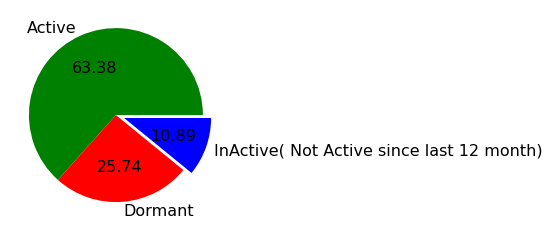

In [ ]:
#value counts in target variable
outputs = pd.DataFrame(df2['Current Status of your accounts (Output variable)'].value_counts()).reset_index()
plt.pie(x =outputs['Current Status of your accounts (Output variable)'], colors = ['g', 'r', 'b'],labels=outputs['index'], explode =  (0, 0, 0.1),textprops={'fontsize': 16},autopct='%.2f')
        

In [ ]:
df2['Current Status of your accounts (Output variable)'].value_counts()

Active                                       687
Dormant                                      279
InActive( Not Active since last 12 month)    118
Name: Current Status of your accounts (Output variable), dtype: int64

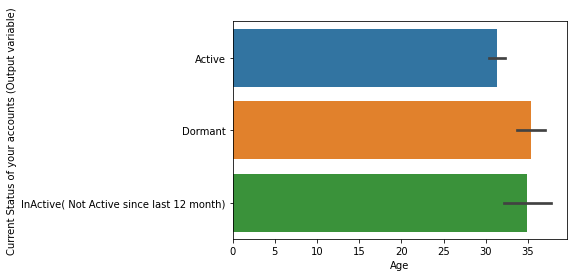

In [ ]:
#barplot
sns.barplot(x = df2['Age'], y = df2['Current Status of your accounts (Output variable)'])

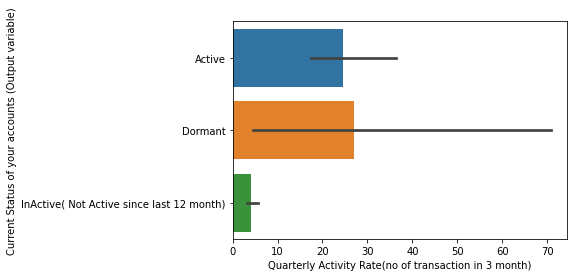

In [ ]:
sns.barplot(x = df2['Quarterly Activity Rate(no of transaction in 3 month)'], y= df2['Current Status of your accounts (Output variable)'])

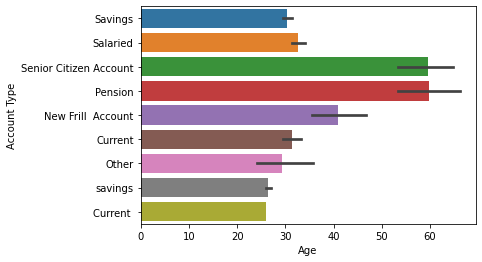

In [ ]:
 sns.barplot(x = df2['Age'], y =df2['Account Type'])

In [ ]:
df2['Are you satisfied with the service provided by bank'] = df2['Are you satisfied with the service provided by bank'].replace(['yes'], 'Yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


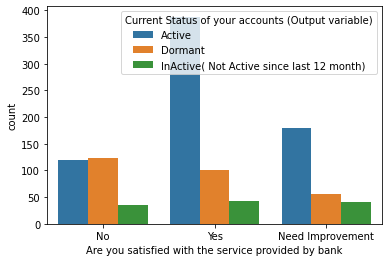

In [ ]:
sns.countplot(x = df2['Are you satisfied with the service provided by bank'], hue = df2['Current Status of your accounts (Output variable)'])

In [ ]:
df2['Account Type'] = df2['Account Type'].replace(['savings'], 'Savings')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


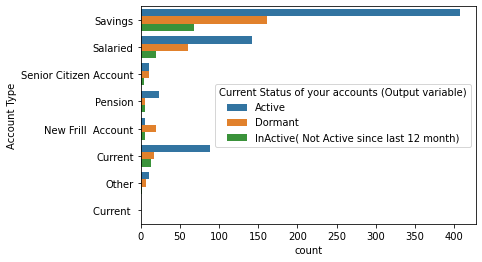

In [ ]:
sns.countplot(y = df2['Account Type'], hue = df2['Current Status of your accounts (Output variable)'])

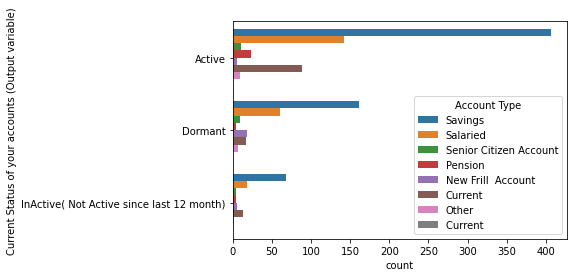

In [ ]:
sns.countplot(y = df2['Current Status of your accounts (Output variable)'], hue = df2['Account Type'])

**Customize bin size**

In [ ]:
bins = [0, 30, 150, 800, 30000]
labels = ['near', 'intercity', 'interstate', 'abroad']
df2['dist_from_house'] = pd.cut(df2['House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)'], bins, labels = labels)
print(df2['dist_from_house'])


0       interstate
1             near
2           abroad
3             near
4             near
           ...    
1085          near
1086          near
1087          near
1088          near
1089          near
Name: dist_from_house, Length: 1084, dtype: category
Categories (4, object): ['near' < 'intercity' < 'interstate' < 'abroad']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


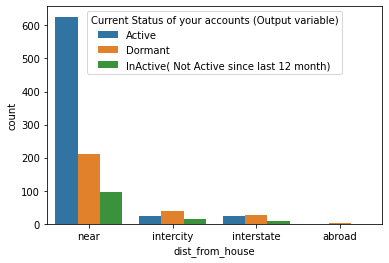

In [ ]:
sns.countplot(x = df2['dist_from_house'], hue =df2['Current Status of your accounts (Output variable)'])

In [ ]:
df2.head()

,Gender,Age,Education qualification,Occupation,Account Type,City,Current City,"House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)",Opening Balance,Having Minimum Balance,Current Balance,"Month and year when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)",Quarterly Activity Rate(no of transaction in 3 month),Do you have multiple account,Do you have an active loan,Do you have Internet Banking or mobile banking with this account,Do you have active Credit Card with this account,Did any suspicious transaction reported in your account,Have you ever defaulted any loan payment,Are you satisfied with the service provided by bank,Current Status of your accounts (Output variable),Received any service call from bank in 24 month with reference to your account. (EDA),Transaction done in 24 month,Do you have recent closed Loan,Do you have the Demat account associated to this account.,dist_from_house
0,Male,23,Graduate,Salaried,Savings,ballari,bengalore,300,2000,Yes,2000,01-01-2021,2,Yes,No,Yes,No,Yes,No,No,Active,No,Yes,No,No,interstate
1,Male,40,Post Graduate,Salaried,Savings,Chennai,Chennai,10,10000,Yes,15000,01-02-2021,30,Yes,Yes,Yes,No,No,No,Yes,Active,Yes,Yes,No,No,near
2,Male,32,Post Graduate,Salaried,Salaried,gorakhpur,greater Noida,825,500,Yes,623,01-05-2017,7,Yes,Yes,No,No,No,Yes,No,Dormant,No,No,No,No,abroad
3,Male,23,Graduate,Student,Savings,Ramgarh cantt,Ramgarh cantt,20,0,Yes,1000,01-01-2021,5,Yes,No,Yes,Yes,No,No,Yes,Active,No,Yes,Yes,Yes,near
4,Female,40,Doctrate,Business,Savings,bhalki,bhalki,1,3000,No,1000,01-06-2020,5,Yes,Yes,Yes,Yes,Yes,No,Yes,Active,No,Yes,Yes,Yes,near


Calculate no of months since last transaction

In [ ]:
import datetime as datetime
end_date = datetime.datetime(2021,4,1)
df4=df2


In [ ]:
dt = df4['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)']
dtdf = pd.DataFrame(dt.str.split(pat="-",expand=True))

In [ ]:
dtdf.columns = ['day','month','year']
present_month = 4
present_year = 2021
dtdf.isna().sum()
dtdf['month'] = dtdf['month'].astype(int)
dtdf['year'] = dtdf['year'].astype(int)
dtdf['no_months'] = (present_year - dtdf['year'])*12 +  (present_month - dtdf['month'])
df2['no_of_months_last_transaction'] = dtdf['no_months']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df3 = df2.drop(columns=['Month and year  when the last transaction was done in 24 month(for ex Jan -2021, Mar-2018 etc)', 'House Distance from Bank(in KM)(Binning)(Near, Outskirts, Intercity, Abroad)'], axis = 1)

In [ ]:
df3.columns

Index(['Gender', 'Age', 'Education qualification', 'Occupation',
       'Account Type', 'City', 'Current City', 'Opening Balance',
       'Having Minimum Balance', 'Current Balance',
       'Quarterly Activity Rate(no of transaction in 3 month)',
       'Do you have multiple account', 'Do you have an active  loan ',
       'Do you have Internet Banking or mobile banking with this  account',
       'Do you have active Credit Card with this account',
       'Did any suspicious transaction reported in your account',
       'Have you ever defaulted any loan payment',
       'Are you satisfied with the service provided by bank',
       'Current Status of your accounts (Output variable)',
       'Received any service call from bank  in 24 month with reference to  your account. (EDA)',
       ' Transaction done in 24 month', 'Do you have recent closed Loan ',
       'Do you have the Demat account associated to this account.',
       'dist_from_house', 'no_of_months_last_transaction'],
      d

 **merge 'city'and 'current city' column**

In [ ]:
df3['City'] = df3['City'].str.lower() 
df3['Current City'] = df3['Current City'].str.lower()

df3['City'] = df3['City'].str.strip()
df3['Current City'] = df3['Current City'].str.strip()

df3['City'] = df3['City'].replace(['hydearbad','hydrabad','hyd','hydrebad','hyder'],'hyderabad')
df3['City'] = df3['City'].replace(['ghaizabad','ghazibad'],'ghaziabad')
df3['City'] = df3['City'].replace(['bhilau'],'bhilai')
df3['City'] = df3['City'].replace(['dalton gnaj'],'daltonganj')
df3['City'] = df3['City'].replace(['margoan'],'margaon')
df3['City'] = df3['City'].replace(['ranaaghat'],'ranaghat')
df3['City'] = df3['City'].replace(['sulepate'],'sulapete')
df3['City'] = df3['City'].replace(['warangal rural'],'warangal')
df3['City'] = df3['City'].replace(['balahlghat'],'balaghat')
df3['City'] = df3['City'].replace(['kollata'],'kolkata')
df3['City'] = df3['City'].replace(['bandalore','banagalore'],'bangalore')
df3['City'] = df3['City'].replace(['coiambatoor'],'coimbatore')
df3['City'] = df3['City'].replace(['dehi'],'delhi')

df3['Current City'] = df3['Current City'].replace(['hydearbad','hydrabad','hyd','hydrebad','hyder'],'hyderabad')
df3['Current City'] = df3['Current City'].replace(['ghaizabad','ghazibad'],'ghaziabad')
df3['Current City'] = df3['Current City'].replace(['bhilau'],'bhilai')
df3['Current City'] = df3['Current City'].replace(['dalton gnaj'],'daltonganj')
df3['Current City'] = df3['Current City'].replace(['margoan'],'margaon')
df3['Current City'] = df3['Current City'].replace(['ranaaghat'],'ranaghat')
df3['Current City'] = df3['Current City'].replace(['sulepate'],'sulapete')
df3['Current City'] = df3['Current City'].replace(['warangal rural'],'warangal')
df3['Current City'] = df3['Current City'].replace(['balahlghat'],'balaghat')
df3['Current City'] = df3['Current City'].replace(['kollata'],'kolkata')
df3['Current City'] = df3['Current City'].replace(['bandalore','banagalore'],'bangalore')
df3['Current City'] = df3['Current City'].replace(['coiambatoor'],'coimbatore')
df3['Current City'] = df3['Current City'].replace(['dehi'],'delhi')

df3['city_change'] = (df3['City'] != df3['Current City'])
#df3['Current City'].str.isalpha().sum()
#df3.City.isna().sum()

In [ ]:
temp_df = (df3['City'] == df3['Current City'])
city_df = pd.DataFrame(df3['City'])
city_df['Current City'] = df3['Current City']
city_df['same'] = temp_df
city_df['not_same'] = (city_df['City'] != city_df['Current City'])
city_df[city_df['not_same']]

#unequal = city_df[city_df['not_same']]
#unequal['city_sub'] = unequal['City'].str.slice(0, 2)
#unequal['current_city_sub'] = unequal['Current City'].str.slice(0,2)
#unequal['pre_same'] = (unequal['city_sub'] == unequal['current_city_sub'])
#unequal[unequal['pre_same']]


,City,Current City,same,not_same
0,ballari,bengalore,False,True
2,gorakhpur,greater noida,False,True
9,dharm,chennai,False,True
11,mehebubnagr,jamkhandi,False,True
12,gulbarga,hyderabad,False,True
...,...,...,...,...
1082,delhi,gorakhpur,False,True
1083,nellore,vizag,False,True
1084,naharlagun,gorakhpur,False,True
1086,singarayakonda,nellore,False,True


In [ ]:
df3.head()

,Gender,Age,Education qualification,Occupation,Account Type,City,Current City,Opening Balance,Having Minimum Balance,Current Balance,Quarterly Activity Rate(no of transaction in 3 month),Do you have multiple account,Do you have an active loan,Do you have Internet Banking or mobile banking with this account,Do you have active Credit Card with this account,Did any suspicious transaction reported in your account,Have you ever defaulted any loan payment,Are you satisfied with the service provided by bank,Current Status of your accounts (Output variable),Received any service call from bank in 24 month with reference to your account. (EDA),Transaction done in 24 month,Do you have recent closed Loan,Do you have the Demat account associated to this account.,dist_from_house,no_of_months_last_transaction,city_change
0,Male,23,Graduate,Salaried,Savings,ballari,bengalore,2000,Yes,2000,2,Yes,No,Yes,No,Yes,No,No,Active,No,Yes,No,No,interstate,3,True
1,Male,40,Post Graduate,Salaried,Savings,chennai,chennai,10000,Yes,15000,30,Yes,Yes,Yes,No,No,No,Yes,Active,Yes,Yes,No,No,near,2,False
2,Male,32,Post Graduate,Salaried,Salaried,gorakhpur,greater noida,500,Yes,623,7,Yes,Yes,No,No,No,Yes,No,Dormant,No,No,No,No,abroad,47,True
3,Male,23,Graduate,Student,Savings,ramgarh cantt,ramgarh cantt,0,Yes,1000,5,Yes,No,Yes,Yes,No,No,Yes,Active,No,Yes,Yes,Yes,near,3,False
4,Female,40,Doctrate,Business,Savings,bhalki,bhalki,3000,No,1000,5,Yes,Yes,Yes,Yes,Yes,No,Yes,Active,No,Yes,Yes,Yes,near,10,False


In [ ]:
df_bank = df3.drop(columns = ['City', 'Current City'], axis = 1)

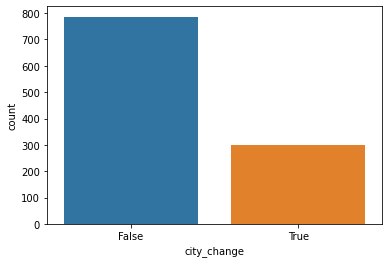

In [ ]:
sns.countplot(x = 'city_change', data = df_bank)

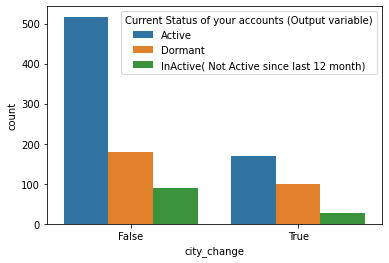

In [ ]:
sns.countplot(x = 'city_change', hue = 'Current Status of your accounts (Output variable)', data = df_bank )

**Feature selection**

In [ ]:
df_bank['dist_from_house'] = df_bank['dist_from_house'].fillna(df_bank['dist_from_house'].mode()[0])

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 1089
Data columns (total 24 columns):
 #   Column                                                                                   Non-Null Count  Dtype   
---  ------                                                                                   --------------  -----   
 0   Gender                                                                                   1084 non-null   object  
 1   Age                                                                                      1084 non-null   int64   
 2   Education qualification                                                                  1084 non-null   object  
 3   Occupation                                                                               1084 non-null   object  
 4   Account Type                                                                             1084 non-null   object  
 5   Opening Balance                                        

seperate categorical and numerical columns

In [ ]:
#numeric_data = df_bank.select_dtypes(include=[np.number])
categorical_data = df_bank.select_dtypes(exclude=[np.number])

In [ ]:
categorical_data.head()

,Gender,Education qualification,Occupation,Account Type,Having Minimum Balance,Do you have multiple account,Do you have an active loan,Do you have Internet Banking or mobile banking with this account,Do you have active Credit Card with this account,Did any suspicious transaction reported in your account,Have you ever defaulted any loan payment,Are you satisfied with the service provided by bank,Current Status of your accounts (Output variable),Received any service call from bank in 24 month with reference to your account. (EDA),Transaction done in 24 month,Do you have recent closed Loan,Do you have the Demat account associated to this account.,dist_from_house,city_change
0,Male,Graduate,Salaried,Savings,Yes,Yes,No,Yes,No,Yes,No,No,Active,No,Yes,No,No,interstate,True
1,Male,Post Graduate,Salaried,Savings,Yes,Yes,Yes,Yes,No,No,No,Yes,Active,Yes,Yes,No,No,near,False
2,Male,Post Graduate,Salaried,Salaried,Yes,Yes,Yes,No,No,No,Yes,No,Dormant,No,No,No,No,abroad,True
3,Male,Graduate,Student,Savings,Yes,Yes,No,Yes,Yes,No,No,Yes,Active,No,Yes,Yes,Yes,near,False
4,Female,Doctrate,Business,Savings,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Active,No,Yes,Yes,Yes,near,False


In [ ]:
numeric_data = df_bank.select_dtypes(include=[np.number])

In [ ]:
numeric_data.head()

,Age,Opening Balance,Current Balance,Quarterly Activity Rate(no of transaction in 3 month),no_of_months_last_transaction
0,23,2000,2000,2,3
1,40,10000,15000,30,2
2,32,500,623,7,47
3,23,0,1000,5,3
4,40,3000,1000,5,10


**Encoding categorical columns**

In [ ]:
#one hot encoding
#!pip install category_encoders
import category_encoders as ce

enc = ce.OneHotEncoder(cols = ['Having Minimum Balance','Do you have multiple account','Do you have an active  loan ',
                                   'Do you have Internet Banking or mobile banking with this  account', 'Do you have active Credit Card with this account',
                                   'Did any suspicious transaction reported in your account','Have you ever defaulted any loan payment',
                                   'Received any service call from bank  in 24 month with reference to  your account. (EDA)',
                                   ' Transaction done in 24 month','Do you have recent closed Loan ','Do you have the Demat account associated to this account.',
                                'city_change'], return_df = True, use_cat_names = True )




In [ ]:
categorical_data['Do you have multiple account'] = categorical_data['Do you have multiple account'].replace(['Yes '], 'yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical_data['Do you have active Credit Card with this account'] = categorical_data['Do you have active Credit Card with this account'].replace(['Yes ','Yes'],'yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical_data['Did any suspicious transaction reported in your account'] = categorical_data['Did any suspicious transaction reported in your account'].replace(['No','No '],'no')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical_data['Do you have recent closed Loan '] = categorical_data['Do you have recent closed Loan '].replace(['No '], 'No')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical_data['Do you have the Demat account associated to this account.'] = categorical_data['Do you have the Demat account associated to this account.'].replace(['Yes '],'Yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical_data['Do you have the Demat account associated to this account.'] = categorical_data['Do you have the Demat account associated to this account.'].replace(['No '],'No')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical_data['Do you have multiple account'] = categorical_data['Do you have multiple account'].replace(['yes'], 'Yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical_data['Received any service call from bank  in 24 month with reference to  your account. (EDA)'] = categorical_data['Received any service call from bank  in 24 month with reference to  your account. (EDA)'].replace(['No '],'No')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
categorical_data['Do you have Internet Banking or mobile banking with this  account'] =categorical_data['Do you have Internet Banking or mobile banking with this  account'].replace(['Yes ', 'yes'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cat_data = enc.fit_transform(categorical_data)
cat_data

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Gender,Education qualification,Occupation,Account Type,Having Minimum Balance_Yes,Having Minimum Balance_No,Do you have multiple account_Yes,Do you have multiple account_No,Do you have an active loan _No,Do you have an active loan _Yes,Do you have Internet Banking or mobile banking with this account_Yes,Do you have Internet Banking or mobile banking with this account_No,Do you have active Credit Card with this account_No,Do you have active Credit Card with this account_yes,Did any suspicious transaction reported in your account_Yes,Did any suspicious transaction reported in your account_no,Have you ever defaulted any loan payment_No,Have you ever defaulted any loan payment_Yes,Are you satisfied with the service provided by bank,Current Status of your accounts (Output variable),Received any service call from bank in 24 month with reference to your account. (EDA)_No,Received any service call from bank in 24 month with reference to your account. (EDA)_Yes,Transaction done in 24 month_Yes,Transaction done in 24 month_No,Do you have recent closed Loan _No,Do you have recent closed Loan _Yes,Do you have the Demat account associated to this account._No,Do you have the Demat account associated to this account._Yes,dist_from_house,city_change_True,city_change_False
0,Male,Graduate,Salaried,Savings,1,0,1,0,1,0,1,0,1,0,1,0,1,0,No,Active,1,0,1,0,1,0,1,0,interstate,1,0
1,Male,Post Graduate,Salaried,Savings,1,0,1,0,0,1,1,0,1,0,0,1,1,0,Yes,Active,0,1,1,0,1,0,1,0,near,0,1
2,Male,Post Graduate,Salaried,Salaried,1,0,1,0,0,1,0,1,1,0,0,1,0,1,No,Dormant,1,0,0,1,1,0,1,0,abroad,1,0
3,Male,Graduate,Student,Savings,1,0,1,0,1,0,1,0,0,1,0,1,1,0,Yes,Active,1,0,1,0,0,1,0,1,near,0,1
4,Female,Doctrate,Business,Savings,0,1,1,0,0,1,1,0,0,1,1,0,1,0,Yes,Active,1,0,1,0,0,1,0,1,near,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,Female,Graduate,Student,Savings,1,0,0,1,1,0,0,1,1,0,0,1,1,0,Need Improvement,Active,1,0,1,0,1,0,1,0,near,0,1
1086,Male,Graduate,Student,Savings,1,0,0,1,1,0,1,0,1,0,0,1,1,0,Yes,Active,1,0,1,0,1,0,1,0,near,1,0
1087,Female,Graduate,Other,Other,1,0,0,1,1,0,0,1,1,0,0,1,1,0,Yes,Active,1,0,1,0,1,0,1,0,near,1,0
1088,Male,Doctrate,Salaried,Pension,1,0,1,0,0,1,1,0,1,0,0,1,1,0,Yes,Active,1,0,1,0,0,1,1,0,near,0,1


In [ ]:
cat_data1 = cat_data.drop(cat_data.columns[[5,7,8,11,12,15,16,20,23,24,26,30]], axis = 'columns')

In [ ]:
cat_data1

,Gender,Education qualification,Occupation,Account Type,Having Minimum Balance_Yes,Do you have multiple account_Yes,Do you have an active loan _Yes,Do you have Internet Banking or mobile banking with this account_Yes,Do you have active Credit Card with this account_yes,Did any suspicious transaction reported in your account_Yes,Have you ever defaulted any loan payment_Yes,Are you satisfied with the service provided by bank,Current Status of your accounts (Output variable),Received any service call from bank in 24 month with reference to your account. (EDA)_Yes,Transaction done in 24 month_Yes,Do you have recent closed Loan _Yes,Do you have the Demat account associated to this account._Yes,dist_from_house,city_change_True
0,Male,Graduate,Salaried,Savings,1,1,0,1,0,1,0,No,Active,0,1,0,0,interstate,1
1,Male,Post Graduate,Salaried,Savings,1,1,1,1,0,0,0,Yes,Active,1,1,0,0,near,0
2,Male,Post Graduate,Salaried,Salaried,1,1,1,0,0,0,1,No,Dormant,0,0,0,0,abroad,1
3,Male,Graduate,Student,Savings,1,1,0,1,1,0,0,Yes,Active,0,1,1,1,near,0
4,Female,Doctrate,Business,Savings,0,1,1,1,1,1,0,Yes,Active,0,1,1,1,near,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,Female,Graduate,Student,Savings,1,0,0,0,0,0,0,Need Improvement,Active,0,1,0,0,near,0
1086,Male,Graduate,Student,Savings,1,0,0,1,0,0,0,Yes,Active,0,1,0,0,near,1
1087,Female,Graduate,Other,Other,1,0,0,0,0,0,0,Yes,Active,0,1,0,0,near,1
1088,Male,Doctrate,Salaried,Pension,1,1,1,1,0,0,0,Yes,Active,0,1,1,0,near,0


Label encoding

In [ ]:
cat_data1['Are you satisfied with the service provided by bank'].value_counts()

Yes                 530
No                  278
Need Improvement    276
Name: Are you satisfied with the service provided by bank, dtype: int64

In [ ]:
cleanup_nums = {"Gender":     {"Male": 0, "Female": 1, "Transgender":2},
                "Are you satisfied with the service provided by bank": {"Yes": 0, "No": 1, "Need Improvement": 2}, "Current Status of your accounts (Output variable)": {"Active": 0, "Dormant": 1, "InActive( Not Active since last 12 month)":2}}
                                   

In [ ]:
cat_data1 = cat_data1.replace(cleanup_nums)

In [ ]:
cat_data1

,Gender,Education qualification,Occupation,Account Type,Having Minimum Balance_Yes,Do you have multiple account_Yes,Do you have an active loan _Yes,Do you have Internet Banking or mobile banking with this account_Yes,Do you have active Credit Card with this account_yes,Did any suspicious transaction reported in your account_Yes,Have you ever defaulted any loan payment_Yes,Are you satisfied with the service provided by bank,Current Status of your accounts (Output variable),Received any service call from bank in 24 month with reference to your account. (EDA)_Yes,Transaction done in 24 month_Yes,Do you have recent closed Loan _Yes,Do you have the Demat account associated to this account._Yes,dist_from_house,city_change_True
0,0,Graduate,Salaried,Savings,1,1,0,1,0,1,0,1,0,0,1,0,0,interstate,1
1,0,Post Graduate,Salaried,Savings,1,1,1,1,0,0,0,0,0,1,1,0,0,near,0
2,0,Post Graduate,Salaried,Salaried,1,1,1,0,0,0,1,1,1,0,0,0,0,abroad,1
3,0,Graduate,Student,Savings,1,1,0,1,1,0,0,0,0,0,1,1,1,near,0
4,1,Doctrate,Business,Savings,0,1,1,1,1,1,0,0,0,0,1,1,1,near,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1,Graduate,Student,Savings,1,0,0,0,0,0,0,2,0,0,1,0,0,near,0
1086,0,Graduate,Student,Savings,1,0,0,1,0,0,0,0,0,0,1,0,0,near,1
1087,1,Graduate,Other,Other,1,0,0,0,0,0,0,0,0,0,1,0,0,near,1
1088,0,Doctrate,Salaried,Pension,1,1,1,1,0,0,0,0,0,0,1,1,0,near,0


target encoding

In [ ]:
#target encoding
import category_encoders as ce
encoder=ce.TargetEncoder(cols= 'Education qualification')

#Fit and Transform Train Data
cat_data1['Education qualification'] = encoder.fit_transform(cat_data1['Education qualification'],cat_data1['Current Status of your accounts (Output variable)'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
enc = ce.TargetEncoder(cols = 'Occupation')

cat_data1['Occupation'] = enc.fit_transform(cat_data1['Occupation'], cat_data1['Current Status of your accounts (Output variable)'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
enco = ce.TargetEncoder(cols = 'Account Type')

cat_data1['Account Type'] = enco.fit_transform(cat_data1['Account Type'], cat_data1['Current Status of your accounts (Output variable)'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
encod = ce.TargetEncoder(cols ='dist_from_house')

cat_data1['dist_from_house']= encod.fit_transform(cat_data1['dist_from_house'],cat_data1['Current Status of your accounts (Output variable)'] )

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
cat_data1

,Gender,Education qualification,Occupation,Account Type,Having Minimum Balance_Yes,Do you have multiple account_Yes,Do you have an active loan _Yes,Do you have Internet Banking or mobile banking with this account_Yes,Do you have active Credit Card with this account_yes,Did any suspicious transaction reported in your account_Yes,Have you ever defaulted any loan payment_Yes,Are you satisfied with the service provided by bank,Current Status of your accounts (Output variable),Received any service call from bank in 24 month with reference to your account. (EDA)_Yes,Transaction done in 24 month_Yes,Do you have recent closed Loan _Yes,Do you have the Demat account associated to this account._Yes,dist_from_house,city_change_True
0,0,0.402622,0.468182,0.466981,1,1,0,1,0,1,0,1,0,0,1,0,0,0.724138,1
1,0,0.545455,0.468182,0.466981,1,1,1,1,0,0,0,0,0,1,1,0,0,0.427666,0
2,0,0.545455,0.468182,0.443439,1,1,1,0,0,0,1,1,1,0,0,0,0,0.643830,1
3,0,0.402622,0.403909,0.466981,1,1,0,1,1,0,0,0,0,0,1,1,1,0.427666,0
4,1,0.600000,0.476471,0.466981,0,1,1,1,1,1,0,0,0,0,1,1,1,0.427666,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1,0.402622,0.403909,0.466981,1,0,0,0,0,0,0,2,0,0,1,0,0,0.427666,0
1086,0,0.402622,0.403909,0.466981,1,0,0,1,0,0,0,0,0,0,1,0,0,0.427666,1
1087,1,0.402622,0.609195,0.578947,1,0,0,0,0,0,0,0,0,0,1,0,0,0.427666,1
1088,0,0.600000,0.468182,0.454545,1,1,1,1,0,0,0,0,0,0,1,1,0,0.427666,0


In [ ]:
X = cat_data1.loc[:,cat_data1.columns != 'Current Status of your accounts (Output variable)' ]
y = cat_data1['Current Status of your accounts (Output variable)']

In [ ]:
X.shape

In [ ]:
#split the data 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (758, 18) (758,)
Test (326, 18) (326,)


**Chi- square test and mutual information for categorical data**

In [ ]:
#chi square test

In [ ]:
#f scores and p values
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train, y_train)


In [ ]:
f_p_values

(array([  9.99493897,   0.23974956,   0.41435574,   0.79116461,
          8.86387363,  16.40621851,   3.72354972,  23.97896778,
         18.11015376,   1.62684981,   9.73335314,   7.2422058 ,
          1.76640218, 124.74610612,   0.24202534,   1.53093822,
          1.30651277,   8.65924306]),
 array([6.75501905e-03, 8.87031502e-01, 8.12875052e-01, 6.73287867e-01,
        1.18914358e-02, 2.73800928e-04, 1.55396578e-01, 6.20916651e-06,
        1.16796567e-04, 4.43337077e-01, 7.69890959e-03, 2.67531541e-02,
        4.13457277e-01, 8.16069670e-28, 8.86022736e-01, 4.65115688e-01,
        5.20348561e-01, 1.31725319e-02]))

In [ ]:
#lower the p value the more important the feature is
p_values = pd.Series(f_p_values[1])
p_values.index = X_train.columns
p_values


Gender                                                                                         6.755019e-03
Education qualification                                                                        8.870315e-01
Occupation                                                                                     8.128751e-01
Account Type                                                                                   6.732879e-01
Having Minimum Balance_Yes                                                                     1.189144e-02
Do you have multiple account_Yes                                                               2.738009e-04
Do you have an active  loan _Yes                                                               1.553966e-01
Do you have Internet Banking or mobile banking with this  account_Yes                          6.209167e-06
Do you have active Credit Card with this account_yes                                           1.167966e-04
Did any suspicious transacti

In [ ]:
p_values.sort_values(ascending= True, inplace=True)

In [ ]:
p_values

 Transaction done in 24 month_Yes                                                              8.160697e-28
Do you have Internet Banking or mobile banking with this  account_Yes                          6.209167e-06
Do you have active Credit Card with this account_yes                                           1.167966e-04
Do you have multiple account_Yes                                                               2.738009e-04
Gender                                                                                         6.755019e-03
Have you ever defaulted any loan payment_Yes                                                   7.698910e-03
Having Minimum Balance_Yes                                                                     1.189144e-02
city_change_True                                                                               1.317253e-02
Are you satisfied with the service provided by bank                                            2.675315e-02
Do you have an active  loan 

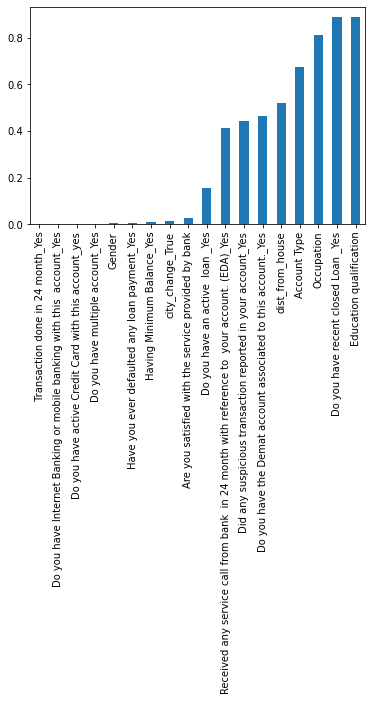

In [ ]:
#plot the values
p_values.plot.bar()

In [ ]:
#recursive feature eleminaion

from sklearn.feature_selection import RFE

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

In [ ]:
#define the method
from sklearn.ensemble import GradientBoostingClassifier
rfecv = RFE(estimator = GradientBoostingClassifier())
model = GradientBoostingClassifier()



In [ ]:
pipe = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, X_train, y_train, scoring = 'accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.8144982456140352

In [ ]:
n_scores

array([0.84210526, 0.81578947, 0.84210526, 0.77631579, 0.77631579,
       0.75      , 0.85526316, 0.82894737, 0.82666667, 0.8       ,
       0.88157895, 0.82894737, 0.76315789, 0.76315789, 0.80263158,
       0.86842105, 0.76315789, 0.85526316, 0.84      , 0.78666667,
       0.85526316, 0.77631579, 0.86842105, 0.82894737, 0.77631579,
       0.82894737, 0.77631579, 0.77631579, 0.82666667, 0.82666667,
       0.76315789, 0.82894737, 0.82894737, 0.84210526, 0.81578947,
       0.78947368, 0.78947368, 0.77631579, 0.84      , 0.78666667,
       0.84210526, 0.88157895, 0.81578947, 0.81578947, 0.82894737,
       0.86842105, 0.80263158, 0.84210526, 0.82666667, 0.73333333])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('Feature Selection',
                 RFE(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                          criterion='friedman_mse',
                                                          init=None,
                                                          learning_rate=0.1,
                                                          loss='deviance',
                                                          max_depth=3,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
          

In [ ]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 9


In [ ]:
pd.DataFrame(rfecv.support_,index=X.columns,columns=['Rank'])

,Rank
Gender,False
Education qualification,True
Occupation,True
Account Type,True
Having Minimum Balance_Yes,True
Do you have multiple account_Yes,True
Do you have an active loan _Yes,False
Do you have Internet Banking or mobile banking with this account_Yes,False
Do you have active Credit Card with this account_yes,False
Did any suspicious transaction reported in your account_Yes,False


In [ ]:
rf_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head(20)

,Rank
city_change_True,1
Education qualification,1
Occupation,1
Account Type,1
Having Minimum Balance_Yes,1
Do you have multiple account_Yes,1
Transaction done in 24 month_Yes,1
Are you satisfied with the service provided by bank,1
dist_from_house,1
Have you ever defaulted any loan payment_Yes,2


In [ ]:
#we will discard categorical features that are irrelevant
cat_feat = cat_data1.drop(cat_data1.columns[[9,13,15,16,18]], axis = 'columns')


In [ ]:
cat_feat

,Gender,Education qualification,Occupation,Account Type,Having Minimum Balance_Yes,Do you have multiple account_Yes,Do you have an active loan _Yes,Do you have Internet Banking or mobile banking with this account_Yes,Do you have active Credit Card with this account_yes,Did any suspicious transaction reported in your account_Yes,Have you ever defaulted any loan payment_Yes,Are you satisfied with the service provided by bank,Current Status of your accounts (Output variable),Received any service call from bank in 24 month with reference to your account. (EDA)_Yes,Transaction done in 24 month_Yes,Do you have recent closed Loan _Yes,Do you have the Demat account associated to this account._Yes,dist_from_house,city_change_True
0,0,0.402622,0.468182,0.466981,1,1,0,1,0,1,0,1,0,0,1,0,0,0.724138,1
1,0,0.545455,0.468182,0.466981,1,1,1,1,0,0,0,0,0,1,1,0,0,0.427666,0
2,0,0.545455,0.468182,0.443439,1,1,1,0,0,0,1,1,1,0,0,0,0,0.643830,1
3,0,0.402622,0.403909,0.466981,1,1,0,1,1,0,0,0,0,0,1,1,1,0.427666,0
4,1,0.600000,0.476471,0.466981,0,1,1,1,1,1,0,0,0,0,1,1,1,0.427666,0


In [ ]:
cat_feat.shape

(1084, 14)

In [ ]:
cat_feat.rename(columns={'Gender_Male':'Gender' ,'Education qualification':'Education', 'Having Minimum Balance_Yes': 'Having Minimum Balance',
                         'Do you have multiple account_Yes' : 'Have multiple accounts','Do you have an active  loan _Yes': 'Have an active loan',
                         'Do you have Internet Banking or mobile banking with this  account_Yes':'Use internet or mobile banking','Do you have active Credit Card with this account_yes':'Have an credit card',
                         'Have you ever defaulted any loan payment_Yes': 'Ever defaulted on a loan','Are you satisfied with the service provided by bank_Yes':'Satisfied with bank service',
                         ' Transaction done in 24 month_Yes':'Any transactions in past 24 months', 'dist_from_house':'Bank distance from residence'}, inplace=True)

In [ ]:
cat_feat

,Gender,Education,Occupation,Account Type,Having Minimum Balance,Have multiple accounts,Have an active loan,Use internet or mobile banking,Have an credit card,Ever defaulted on a loan,Are you satisfied with the service provided by bank,Current Status of your accounts (Output variable),Any transactions in past 24 months,Bank distance from residence
0,0,0.402622,0.468182,0.466981,1,1,0,1,0,0,1,0,1,0.724138
1,0,0.545455,0.468182,0.466981,1,1,1,1,0,0,0,0,1,0.427666
2,0,0.545455,0.468182,0.443439,1,1,1,0,0,1,1,1,0,0.643830
3,0,0.402622,0.403909,0.466981,1,1,0,1,1,0,0,0,1,0.427666
4,1,0.600000,0.476471,0.466981,0,1,1,1,1,0,0,0,1,0.427666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1,0.402622,0.403909,0.466981,1,0,0,0,0,0,2,0,1,0.427666
1086,0,0.402622,0.403909,0.466981,1,0,0,1,0,0,0,0,1,0.427666
1087,1,0.402622,0.609195,0.578947,1,0,0,0,0,0,0,0,1,0.427666
1088,0,0.600000,0.468182,0.454545,1,1,1,1,0,0,0,0,1,0.427666


**Continuous data**

In [ ]:
numeric_data

,Age,Opening Balance,Current Balance,Quarterly Activity Rate(no of transaction in 3 month),no_of_months_last_transaction
0,23,2000,2000,2,3
1,40,10000,15000,30,2
2,32,500,623,7,47
3,23,0,1000,5,3
4,40,3000,1000,5,10
...,...,...,...,...,...
1085,25,500,30000,40,1
1086,23,500,1000,60,1
1087,65,1000,400000,9,6
1088,66,0,9000,40,1


In [ ]:
numeric_data.rename(columns={'Quarterly Activity Rate(no of transaction in 3 month)': 'Quarterly activity rate','no_of_months_last_transaction':'Months since last transaction'},
                    inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#add target column from 'cat_data1' to this dataframe
t_col = cat_data1['Current Status of your accounts (Output variable)']
numeric_data = numeric_data.join(t_col)

In [ ]:
numeric_data

,Age,Opening Balance,Current Balance,Quarterly activity rate,Months since last transaction,Current Status of your accounts (Output variable)
0,23,2000,2000,2,3,0
1,40,10000,15000,30,2,0
2,32,500,623,7,47,1
3,23,0,1000,5,3,0
4,40,3000,1000,5,10,0
...,...,...,...,...,...,...
1085,25,500,30000,40,1,0
1086,23,500,1000,60,1,0
1087,65,1000,400000,9,6,0
1088,66,0,9000,40,1,0


**We use anova test on continuous data**

In [ ]:
X_a = numeric_data.loc[:,numeric_data.columns != 'Current Status of your accounts (Output variable)_Dormant']
y_a = numeric_data['Current Status of your accounts (Output variable)']

In [ ]:
X_a_train,X_a_test,y_a_train,y_a_test = train_test_split(X_a, y_a, test_size=0.33, random_state=1)


In [ ]:
#Anova test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#feature selection
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(X_a_train, y_a_train)
# transform train input data
X_train_fs = fs.transform(X_a_train)
# transform test input data
X_test_fs = fs.transform(X_a_test)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Feature 0: 8.901922
Feature 1: 0.284106
Feature 2: 0.575212
Feature 3: 0.565797
Feature 4: 11.879425
Feature 5: inf


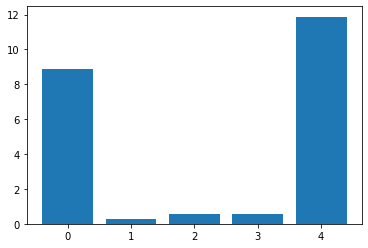

In [ ]:
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()




Feature 4 - no_of_months_last_transaction ,    
Feature 0 - Age,
Feature 3- Quarterly activity rate

In [ ]:
#also using normality test on continuous dataset

# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro 
#set seed
seed(1)
# normality test
stat, p = shapiro(numeric_data['Months since last transaction'])
#stat, p =shapiro(numeric_data['Age'])
#stat,p = shapiro(numeric_data['Current Balance'])
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')



Sample does not look Gaussian (reject H0)


In [ ]:
cont_feat = numeric_data.drop(columns =['Current Status of your accounts (Output variable)' ], axis = 1)

In [ ]:
cont_feat

,Age,Opening Balance,Current Balance,Quarterly activity rate,Months since last transaction
0,23,2000,2000,2,3
1,40,10000,15000,30,2
2,32,500,623,7,47
3,23,0,1000,5,3
4,40,3000,1000,5,10
...,...,...,...,...,...
1085,25,500,30000,40,1
1086,23,500,1000,60,1
1087,65,1000,400000,9,6
1088,66,0,9000,40,1


In [ ]:
cont_feat.shape

(1084, 5)

In [ ]:
cat_feat.shape

(1084, 14)

In [ ]:
new_df = cat_feat.join(cont_feat)

**Building our model**

In [ ]:
new_df.columns

Index(['Current Status of your accounts (Output variable)', 'Gender',
       'Education', 'Occupation', 'Account Type', 'Having Minimum Balance',
       'Have multiple accounts', 'Have an active loan',
       'Use internet or mobile banking', 'Have an credit card',
       'Ever defaulted on a loan',
       'Are you satisfied with the service provided by bank',
       'Any transactions in past 24 months', 'Bank distance from residence',
       'Age', 'Opening Balance', 'Current Balance', 'Quarterly activity rate',
       'Months since last transaction'],
      dtype='object')

In [ ]:
new_df

,Gender,Education,Occupation,Account Type,Having Minimum Balance,Have multiple accounts,Have an active loan,Use internet or mobile banking,Have an credit card,Ever defaulted on a loan,Are you satisfied with the service provided by bank,Current Status of your accounts (Output variable),Any transactions in past 24 months,Bank distance from residence,Age,Opening Balance,Current Balance,Quarterly activity rate,Months since last transaction
0,0,0.402622,0.468182,0.466981,1,1,0,1,0,0,1,0,1,0.724138,23,2000,2000,2,3
1,0,0.545455,0.468182,0.466981,1,1,1,1,0,0,0,0,1,0.427666,40,10000,15000,30,2
2,0,0.545455,0.468182,0.443439,1,1,1,0,0,1,1,1,0,0.643830,32,500,623,7,47
3,0,0.402622,0.403909,0.466981,1,1,0,1,1,0,0,0,1,0.427666,23,0,1000,5,3
4,1,0.600000,0.476471,0.466981,0,1,1,1,1,0,0,0,1,0.427666,40,3000,1000,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,1,0.402622,0.403909,0.466981,1,0,0,0,0,0,2,0,1,0.427666,25,500,30000,40,1
1086,0,0.402622,0.403909,0.466981,1,0,0,1,0,0,0,0,1,0.427666,23,500,1000,60,1
1087,1,0.402622,0.609195,0.578947,1,0,0,0,0,0,0,0,1,0.427666,65,1000,400000,9,6
1088,0,0.600000,0.468182,0.454545,1,1,1,1,0,0,0,0,1,0.427666,66,0,9000,40,1


In [ ]:
new_df = new_df[['Current Status of your accounts (Output variable)','Gender', 'Education', 'Occupation', 'Account Type',
       'Having Minimum Balance', 'Have multiple accounts',
       'Have an active loan', 'Use internet or mobile banking',
       'Have an credit card', 'Ever defaulted on a loan',
       'Are you satisfied with the service provided by bank',
       'Any transactions in past 24 months', 'Bank distance from residence',
       'Age', 'Opening Balance', 'Current Balance', 'Quarterly activity rate',
       'Months since last transaction']]


In [ ]:
#import lazypredict
#from lazypredict.Supervised import LazyClassifier


In [ ]:
new_df

,Current Status of your accounts (Output variable)_Dormant,Gender,Education,Occupation,Account Type,Having Minimum Balance,Have multiple accounts,Have an active loan,Use internet or mobile banking,Have an credit card,Ever defaulted on a loan,Satisfied with bank service,Any transactions in past 24 months,Bank distance from residence,Age,Opening Balance,Current Balance,Quarterly activity rate,Months since last transaction
0,0,1,0.222846,0.286364,0.253145,1,1,0,1,0,0,0,1,0.448276,23,2000,2000,2,3
1,0,1,0.311688,0.286364,0.253145,1,1,1,1,0,0,1,1,0.224921,40,10000,15000,30,2
2,1,1,0.311688,0.286364,0.271493,1,1,1,0,0,1,0,0,0.617879,32,500,623,7,47
3,0,1,0.222846,0.136808,0.253145,1,1,0,1,1,0,1,1,0.224921,23,0,1000,5,3
4,0,0,0.294118,0.264706,0.253145,0,1,1,1,1,0,1,1,0.224921,40,3000,1000,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,0,0,0.222846,0.136808,0.253145,1,0,0,0,0,0,0,1,0.224921,25,500,30000,40,1
1086,0,1,0.222846,0.136808,0.253145,1,0,0,1,0,0,1,1,0.224921,23,500,1000,60,1
1087,0,0,0.222846,0.333333,0.368421,1,0,0,0,0,0,1,1,0.224921,65,1000,400000,9,6
1088,0,1,0.294118,0.286364,0.151515,1,1,1,1,0,0,1,1,0.224921,66,0,9000,40,1


In [ ]:
X_df = new_df.iloc[0:1084,1:19]


In [ ]:
y_df = new_df['Current Status of your accounts (Output variable)']

In [ ]:
#!pip install catboost

In [ ]:
import catboost as cb
from catboost import CatBoostClassifier

In [ ]:
#cat_feat1 = cat_feat.drop(columns = ['Current Status of your accounts (Output variable)_Dormant'], axis = 1)

In [ ]:
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, test_size = 0.30)


In [ ]:
model_cbc = cb.CatBoostClassifier()
model_cbc.fit(X_df_train, y_df_train)
#print(model_cbc)

In [ ]:
expected_y = y_df_test
predicted_y = model_cbc.predict(X_df_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       248
           1       0.82      0.78      0.80        78

    accuracy                           0.91       326
   macro avg       0.88      0.86      0.87       326
weighted avg       0.91      0.91      0.91       326



In [ ]:
print(metrics.confusion_matrix(expected_y, predicted_y))

[[235  13]
 [ 17  61]]


In [ ]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import uniform, truncnorm, randint

In [ ]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)

clf  =RandomizedSearchCV(rf_model, model_params, n_iter=100, cv=5, random_state=1)

In [ ]:
model = clf.fit(X_df, y_df)

In [ ]:
# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.2606530421228426,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.013956146634119322,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 105,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
expected_y = y_df_test
predicted_y = clf.predict(X_df_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(metrics.classification_report(expected_y,predicted_y))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       205
           1       0.92      0.83      0.87        78
           2       1.00      0.49      0.66        43

    accuracy                           0.89       326
   macro avg       0.93      0.77      0.82       326
weighted avg       0.90      0.89      0.88       326



In [ ]:
#import pickle
# open a file, where you ant to store the data
##file = open('model_cbc_trial.pkl', 'wb')

# dump information to that file
#pickle.dump(model_cbc, file)

In [ ]:
#files.download('model_cbc_trial.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>